In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Loading datasets...
Training data shape: (125973, 42)
Test data shape: (22544, 42)
Training data columns: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']
Target column: class
Class distribution in training set:
Counter({'normal': 67343, 'neptune': 41214, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smu

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


Making predictions...
The model hasn't seen these classes during training!
Info: Classes only in train set: {np.int64(30)}
Accuracy: 0.9139

Classification Report:

Top 15 Most Important Features:
                        feature  importance
4                     src_bytes    0.149457
28                same_srv_rate    0.095316
3                          flag    0.076670
37         dst_host_serror_rate    0.060464
25              srv_serror_rate    0.050559
33       dst_host_same_srv_rate    0.048119
29                diff_srv_rate    0.047662
22                        count    0.040288
38     dst_host_srv_serror_rate    0.039963
24                  serror_rate    0.038028
35  dst_host_same_src_port_rate    0.036267
36  dst_host_srv_diff_host_rate    0.034447
5                     dst_bytes    0.034005
34       dst_host_diff_srv_rate    0.033785
1                 protocol_type    0.029676


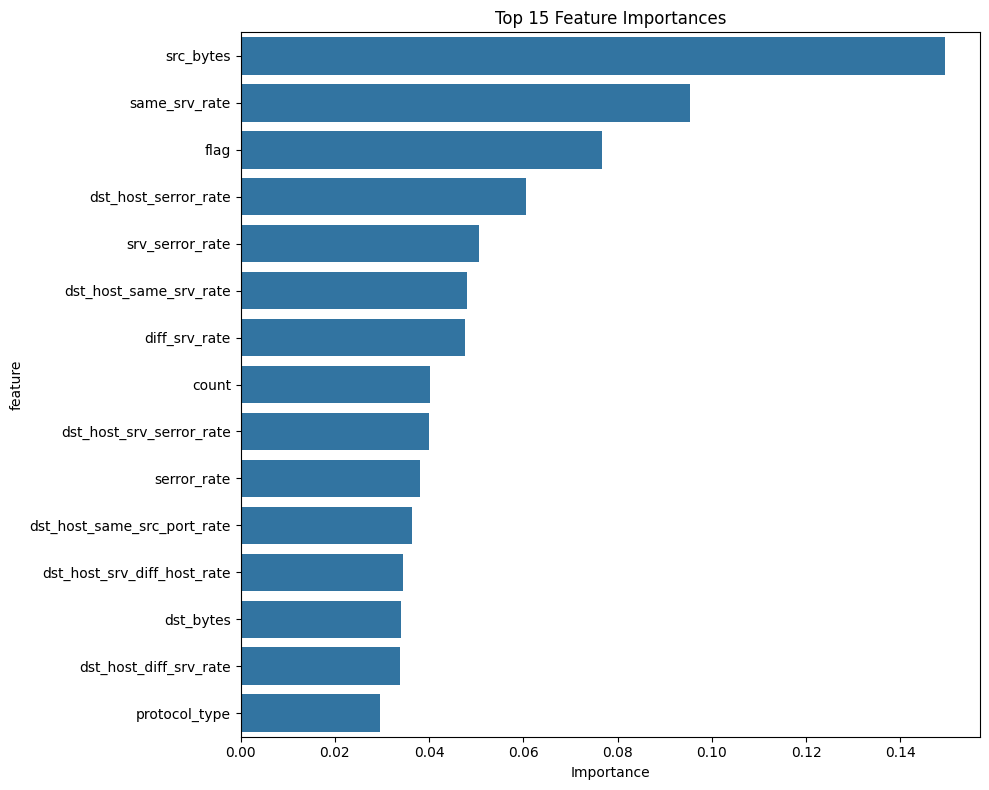

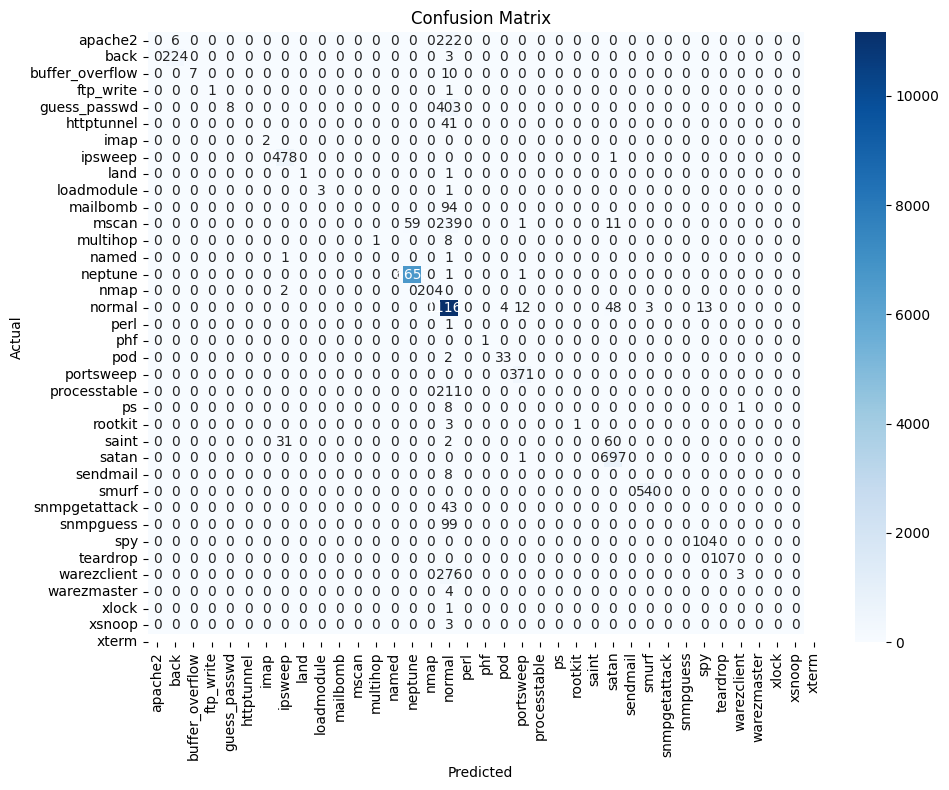


Optional: Hyperparameter tuning (this may take a while)...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\ali51\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9984
Tuned model accuracy: 0.9140

Analysis complete!


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the datasets
print("Loading datasets...")
train_data = pd.read_csv('kdd_train_clean.csv')  # Replace with your train file path
test_data = pd.read_csv('kdd_test_clean.csv')    # Replace with your test file path

# Display basic information about the datasets
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Training data columns: {train_data.columns.tolist()}")

# If your dataset doesn't have column names, uncomment and modify this:
# column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
#                 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
#                 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
#                 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
#                 'num_access_files', 'num_outbound_cmds', 'is_host_login',
#                 'is_guest_login', 'count', 'srv_count', 'serror_rate',
#                 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
#                 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
#                 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
#                 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
#                 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
#                 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
#                 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level']
# train_data.columns = column_names
# test_data.columns = column_names

# Assuming the last column or a column named 'attack_type' contains the labels
# Adjust this based on your actual dataset structure
target_column = train_data.columns[-1]  # or specify the exact column name
print(f"Target column: {target_column}")

# Separate features and target
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]
X_test = test_data.drop(columns=[target_column])
y_test = test_data[target_column]

print(f"Class distribution in training set:")
print(Counter(y_train))

# Handle categorical variables
categorical_columns = X_train.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns.tolist()}")

# Create label encoders for categorical features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    # Fit on combined train and test data to handle unseen categories
    combined_data = pd.concat([X_train[col], X_test[col]], axis=0)
    le.fit(combined_data.astype(str))
    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

# Encode target labels if they are strings
if y_train.dtype == 'object':
    target_encoder = LabelEncoder()
    # Fit on combined train and test labels to handle unseen labels
    combined_labels = pd.concat([y_train, y_test], axis=0)
    target_encoder.fit(combined_labels)
    y_train = target_encoder.transform(y_train)
    y_test = target_encoder.transform(y_test)
    print(f"Target classes: {target_encoder.classes_}")
    
    # Check for class imbalance
    print(f"Number of unique classes in train: {len(np.unique(y_train))}")
    print(f"Number of unique classes in test: {len(np.unique(y_test))}")
    print(f"Total unique classes: {len(target_encoder.classes_)}")

# Optional: Scale numerical features (Random Forest doesn't require scaling but can help)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

print("Training Random Forest classifier...")

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
print("Making predictions...")
y_pred = rf_classifier.predict(X_test)

# Check if there are classes in test that weren't in train
train_classes = set(np.unique(y_train))
test_classes = set(np.unique(y_test))
only_in_test = test_classes - train_classes
only_in_train = train_classes - test_classes

if only_in_test:
    print(f"Warning: Classes only in test set: {only_in_test}")
    print("The model hasn't seen these classes during training!")
if only_in_train:
    print(f"Info: Classes only in train set: {only_in_train}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
if y_train.dtype != 'object':
    # If we encoded the labels, use the original class names
    if 'target_encoder' in locals():
        target_names = target_encoder.classes_
        #print(classification_report(y_test, y_pred, target_names=target_names))
    else:
        print(classification_report(y_test, y_pred))
else:
    print(classification_report(y_test, y_pred))

# Feature importance
print("\nTop 15 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
if 'target_encoder' in locals():
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_encoder.classes_, 
                yticklabels=target_encoder.classes_)
else:
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Optional: Hyperparameter tuning with GridSearchCV
print("\nOptional: Hyperparameter tuning (this may take a while)...")
perform_tuning = input("Do you want to perform hyperparameter tuning? (y/n): ").lower() == 'y'

if perform_tuning:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42, n_jobs=-1),
        param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Train with best parameters
    best_rf = grid_search.best_estimator_
    y_pred_tuned = best_rf.predict(X_test)
    tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
    print(f"Tuned model accuracy: {tuned_accuracy:.4f}")

print("\nAnalysis complete!")